# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Reading in the dataset

wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# Investigating our target

wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [4]:
# Re-calibrating

wine['quality'] = wine['quality'].map(lambda x: x-3)

In [5]:
# Defining X and y

X = wine.drop('quality', axis=1)
y = wine['quality']

In [6]:
wine['quality'].value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

In [7]:
# Splitting and scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [8]:
y_train[:2]

139     2
5010    3
Name: quality, dtype: int64

In [9]:
# Encoding our target

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Constructing our model

model = Sequential()
n_input = X_train_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))

# We want to predict probabilities, so we'll use a softmax activation

model.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
# Compiling
# We want to use categorical crossentropy as our optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
# Fitting and saving the history log

history_log = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                        epochs=42, batch_size=None)


Instructions for updating:
Use tf.cast instead.
Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 77us/step - loss: 1.6959 - acc: 0.3578 - val_loss: 1.4342 - val_acc: 0.4665
Epoch 2/42
4872/4872 [==============================] - 0s 42us/step - loss: 1.3041 - acc: 0.4928 - val_loss: 1.2491 - val_acc: 0.5114
Epoch 3/42
4872/4872 [==============================] - 0s 38us/step - loss: 1.1901 - acc: 0.5255 - val_loss: 1.1857 - val_acc: 0.5286
Epoch 4/42
4872/4872 [==============================] - 0s 42us/step - loss: 1.1456 - acc: 0.5326 - val_loss: 1.1525 - val_acc: 0.5280
Epoch 5/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.1186 - acc: 0.5353 - val_loss: 1.1324 - val_acc: 0.5231
Epoch 6/42
4872/4872 [==============================] - 0s 41us/step - loss: 1.1008 - acc: 0.5388 - val_loss: 1.1189 - val_acc: 0.5237
Epoch 7/42
4872/4872 [==============================] - 0s 36us/step - loss: 1.0874 - acc: 0.5

In [13]:
# Extracting weights

for layer in model.layers:
    print(layer.get_weights())

[array([[-0.6143038 , -0.1294381 , -0.27976307, -0.24482104, -0.15723272,
        -0.653408  ,  0.05367924, -0.393526  ,  0.56513107, -0.12050072,
        -0.08329884,  0.19685344],
       [-0.80252427, -0.14934382, -0.21974683, -0.09327712,  0.7114964 ,
         0.2539546 , -0.93600976, -0.35097   , -0.23827527,  0.15913203,
         0.04320796,  0.02641274],
       [-0.19249189,  0.32943445, -0.07125705, -0.15819804,  0.0528984 ,
         0.3190246 ,  0.13477063, -0.03966689, -0.20520793,  0.017944  ,
        -0.12274869, -0.14087197],
       [ 0.10722096,  0.09535525,  0.1822703 , -0.26287386, -0.36867437,
         0.19389819,  0.29810712, -0.2879937 , -0.4452668 , -1.0323299 ,
         0.03925598,  0.01772426],
       [-0.02362515,  0.04294649,  0.08892897,  0.10667145,  0.2962042 ,
        -0.28182247, -0.01878973, -0.5099213 ,  0.4634575 , -0.23103103,
        -0.03314757, -0.19895037],
       [ 0.46463326, -0.12332946, -0.07905484, -0.6028032 ,  0.08192582,
         0.30456436, 

In [14]:
# Predicting on some test data

model.predict(X_test_s[:5]).round(2)

array([[0.  , 0.  , 0.64, 0.36, 0.  , 0.  , 0.  ],
       [0.01, 0.02, 0.63, 0.31, 0.03, 0.  , 0.  ],
       [0.01, 0.03, 0.36, 0.55, 0.06, 0.  , 0.  ],
       [0.  , 0.01, 0.2 , 0.49, 0.29, 0.01, 0.  ],
       [0.  , 0.01, 0.15, 0.54, 0.29, 0.01, 0.  ]], dtype=float32)

In [15]:
# Comparing with reality

y_test[:5]

array([[0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

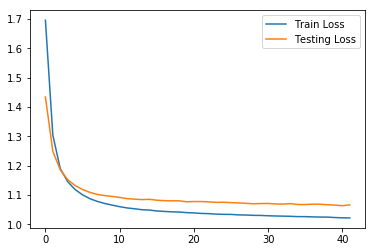

In [16]:
# Plotting

plt.plot(history_log.history['loss'], label='Train Loss')
plt.plot(history_log.history['val_loss'], label='Testing Loss')
plt.legend();

## Adding Regularization

In [17]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(7, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 92us/step - loss: 2.0884 - acc: 0.2752 - val_loss: 1.7871 - val_acc: 0.4142
Epoch 2/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.6330 - acc: 0.4538 - val_loss: 1.5304 - val_acc: 0.4732
Epoch 3/42
4872/4872 [==============================] - 0s 43us/step - loss: 1.4426 - acc: 0.4977 - val_loss: 1.4075 - val_acc: 0.4948
Epoch 4/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.3502 - acc: 0.5142 - val_loss: 1.3456 - val_acc: 0.5175
Epoch 5/42
4872/4872 [==============================] - 0s 36us/step - loss: 1.3000 - acc: 0.5265 - val_loss: 1.3070 - val_acc: 0.5280
Epoch 6/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.2673 - acc: 0.5388 - val_loss: 1.2783 - val_acc: 0.5360
Epoch 7/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.2432 - acc: 0.5435 - val_loss: 1.2564 - val_acc: 0.5391
Epoch 8

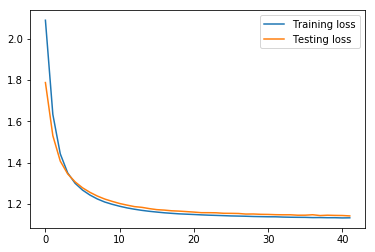

In [18]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [19]:
from keras.layers import Dropout

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2))
model_d.add(Dense(7, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 104us/step - loss: 1.7338 - acc: 0.3054 - val_loss: 1.4663 - val_acc: 0.4271
Epoch 2/42
4872/4872 [==============================] - 0s 44us/step - loss: 1.3866 - acc: 0.4331 - val_loss: 1.2760 - val_acc: 0.4812
Epoch 3/42
4872/4872 [==============================] - 0s 42us/step - loss: 1.2732 - acc: 0.4676 - val_loss: 1.2092 - val_acc: 0.4972
Epoch 4/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.2243 - acc: 0.4828 - val_loss: 1.1752 - val_acc: 0.5120
Epoch 5/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.1984 - acc: 0.4936 - val_loss: 1.1534 - val_acc: 0.5286
Epoch 6/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.1687 - acc: 0.5109 - val_loss: 1.1368 - val_acc: 0.5249
Epoch 7/42
4872/4872 [====

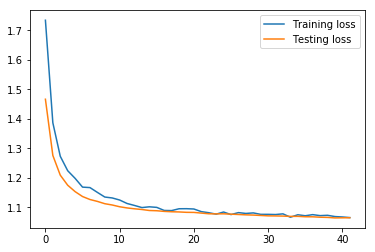

In [20]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [21]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.5502873563218391, 0.5390769227834848)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [22]:
from keras.callbacks import EarlyStopping

In [23]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(7, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                         epochs=42, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 104us/step - loss: 1.7338 - acc: 0.3727 - val_loss: 1.5046 - val_acc: 0.4418
Epoch 2/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.3734 - acc: 0.4651 - val_loss: 1.3045 - val_acc: 0.4738
Epoch 3/42
4872/4872 [==============================] - 0s 41us/step - loss: 1.2327 - acc: 0.5045 - val_loss: 1.2227 - val_acc: 0.4978
Epoch 4/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.1719 - acc: 0.5255 - val_loss: 1.1841 - val_acc: 0.5206
Epoch 5/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.1401 - acc: 0.5402 - val_loss: 1.1612 - val_acc: 0.5305
Epoch 6/42
4872/4872 [==============================] - 0s 40us/step - loss: 1.1198 - acc: 0.5468 - val_loss: 1.1456 - val_acc: 0.5305
Epoch 7/42
4872/4872 [==============================] - 0s 37us/step - loss: 1.1065 - acc: 0.5536 - val_loss: 1.1348 - val_acc: 0.5323
Epoch 

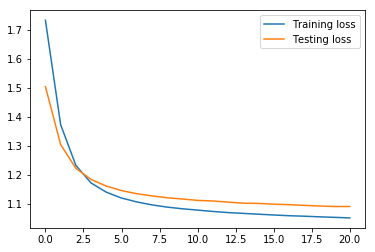

In [24]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();